In [1]:
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image
from random import randint
import IPython as ip

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
import yacht_main as yacht
from yacht_test import create_train_set

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
torch.cuda.is_available()

True

In [2]:
BATCH_SIZE = 128
MEMORY_SIZE = 10000
GAMMA = 0.01
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 500
TARGET_UPDATE = 5
ALPHA = 0.1
REWARD_SCALE = 1.0/50
TRAINSET_PERIOD = 1000
INPUT_SIZE = 44
OUTPUT_SIZE = 43



def select_action(state, avail, training = True):
    random_action = 0
    randomizer = randint(1, avail.sum())
    avail_list = torch.reshape(avail,[-1]).tolist()
    for i in range(len(avail_list)):
        if avail_list[i] == 1:
            if randomizer == 1:
                random_action = i
                break
            randomizer -= 1
    return torch.tensor([[random_action]], device=device, dtype=torch.long)

episode_scores = []

def plot_scores():
    plt.figure(2)
    plt.clf()
    scores_t = torch.tensor(episode_scores, dtype=torch.float)
    plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Score')
    plt.plot(scores_t.numpy())
    # 100개의 에피소드 평균을 가져 와서 도표 그리기
    if len(scores_t) >= 50:
        means = scores_t.unfold(0, 50, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(49), means))
        plt.plot(means.numpy())

    ip.display.clear_output(wait=True)
    plt.pause(0.001)  # 도표가 업데이트되도록 잠시 멈춤
    #if is_ipython:
    #display(plt.gcf())

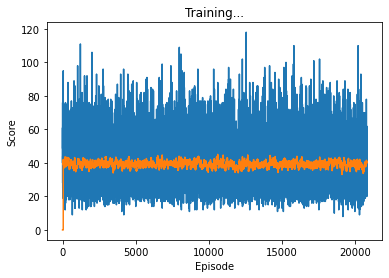

KeyboardInterrupt: 

In [3]:
num_episodes = 500000
for i_episode in range(num_episodes):
    # 환경과 상태 초기화
    yacht.reset_game()
    state, score, _, avail = yacht.get_yacht_output()
    state = torch.tensor(state, dtype=torch.float, device=device, requires_grad = False)
    for t in count():
        # 행동 선택과 수행
        action = select_action(state.reshape(1,INPUT_SIZE), \
                               torch.tensor(avail, dtype=torch.float, device=device, requires_grad = False).reshape(1, OUTPUT_SIZE))
        yacht.update(action)
        new_state, new_score, done, avail = yacht.get_yacht_output()
        
        if done:
            state, score, _, _ = yacht.get_yacht_output()
            episode_scores.append(score)
            #print("{0}) {1}\tscore : {2}, turns = {3}".format(i_episode, state[:12], score, t+1))
            
            if i_episode % 200 == 0:
                plot_scores()
            
            break
            

print('Complete')